# Importações

In [5]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import time
import IPython
import config

%matplotlib inline

## Lendo arquivo de audio

In [12]:
# AUDIO_FILE = './src/1759.wav'
AUDIO_FILE = librosa.ex('trumpet')
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)


print("Example shape:", samples.shape, "\nSample rate:", sample_rate, "\nData type:", type(samples))

Example shape: (117601,) 
Sample rate: 22050 
Data type: <class 'numpy.ndarray'>


### Audio

In [13]:
IPython.display.Audio(AUDIO_FILE)

### Waveplot

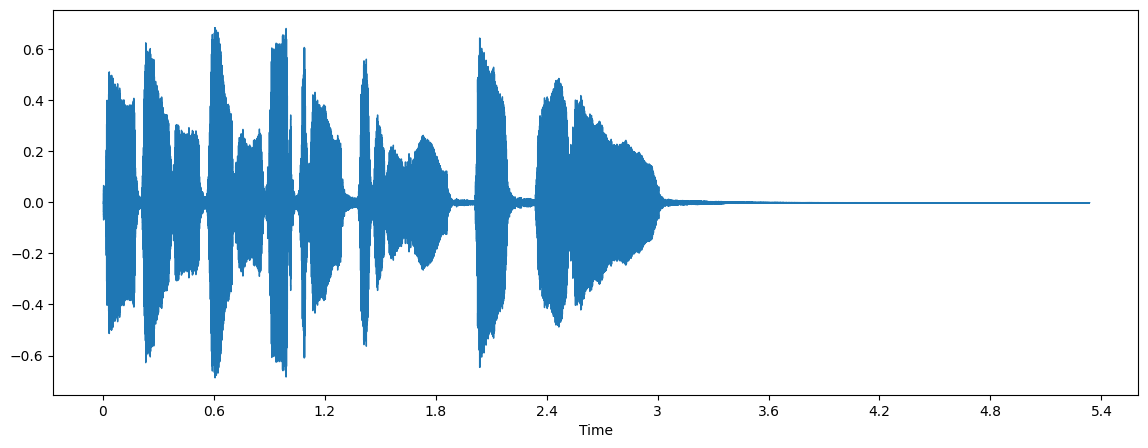

In [14]:
#import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate)

## Espectogramas

###  Short-term Fourier Transform

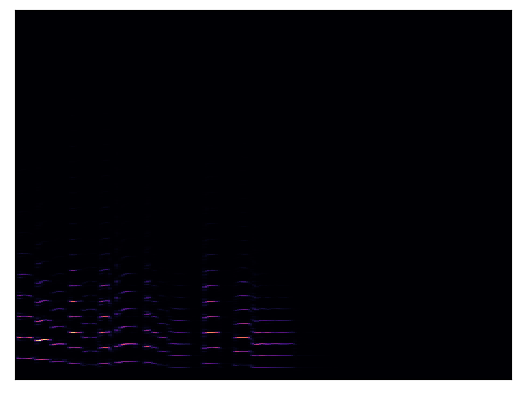

In [16]:
sgram = np.abs(librosa.stft(samples))
librosa.display.specshow(sgram)

- Usando a conversão de amplitude para decibéis. A conversão é feita assim como na documentação [librosa](https://librosa.org/doc/main/generated/librosa.stft.html)

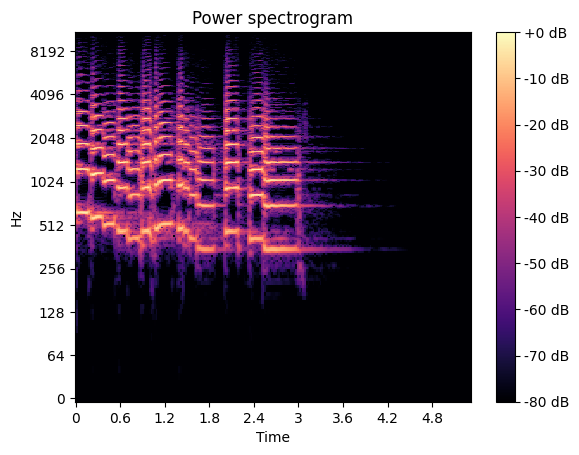

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(sgram, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

### Mel-frequency spectogram

**Leitura e conversão segundo [Towards Data Science](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505)**

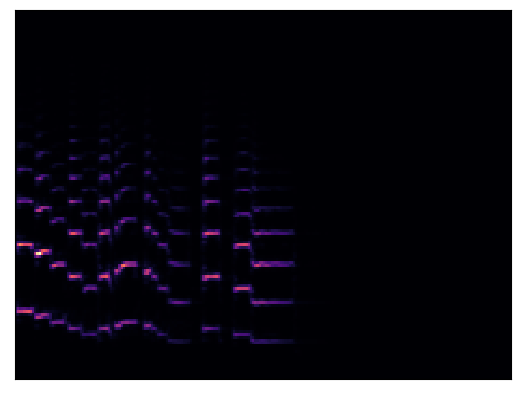

In [20]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

**Leitura e conversão segundo [documentação da biblioteca](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram)**

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

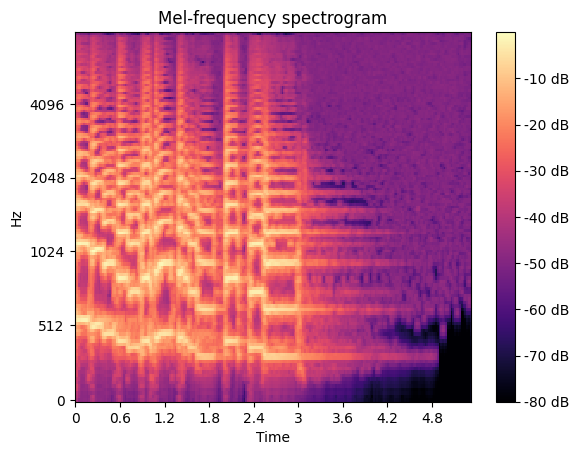

In [26]:
fig, ax = plt.subplots()

mel_scale_sgram_dB = librosa.power_to_db(mel_scale_sgram, ref=np.max)

img = librosa.display.specshow(mel_scale_sgram_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

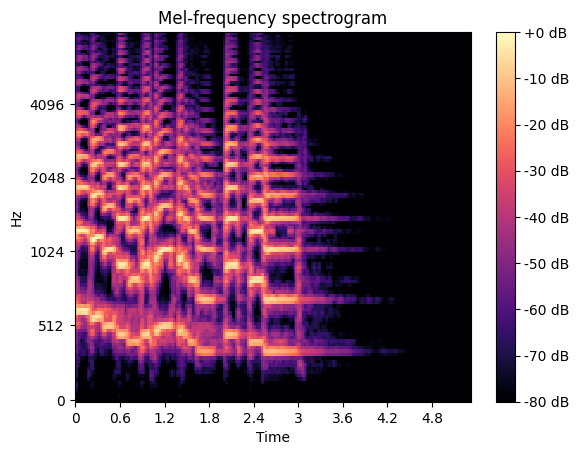

In [27]:
fig, ax = plt.subplots()

y, sr = librosa.load(librosa.ex('trumpet'))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

## Chromas


###  Short-term Fourier Transform

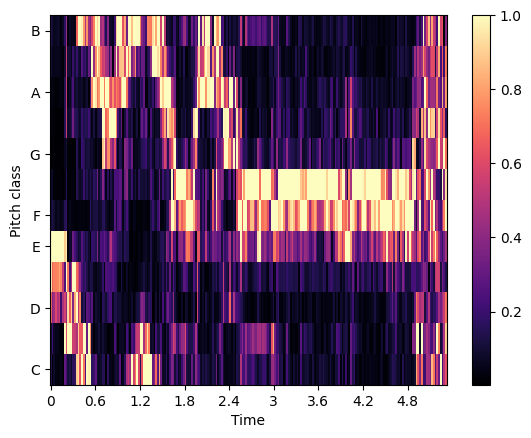

In [30]:
fig, ax = plt.subplots()
chroma = librosa.feature.chroma_stft(S=sgram, sr=sample_rate)
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)

fig.colorbar(img, ax=[ax])